## Observations and Insights 

In [1]:
#Observations
#This assignment was extremely difficult
#Capomulin won
#I hate stats




# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_results['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_results.drop_duplicates(['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
regimens_grouped = clean_mice.groupby(['Drug Regimen'])
regimenmean = regimens_grouped['Tumor Volume (mm3)'].mean()
regimenmedian = regimens_grouped['Tumor Volume (mm3)'].median()
regimenvar = regimens_grouped['Tumor Volume (mm3)'].var()
regimenstd = regimens_grouped['Tumor Volume (mm3)'].std()
regimensem = regimens_grouped['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_sum = pd.DataFrame({
    'Tumor Mean': regimenmean,
    'Tumor Median': regimenmedian,
    'Tumor Variance': regimenvar,
    'Tumor Standard Deviation': regimenstd,
    'Tumor SEM': regimensem
})
mouse_sum

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

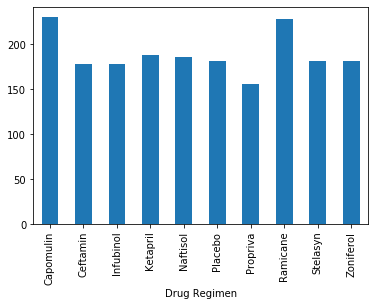

In [9]:
# Generate a bar plot showing the number of mice per time
#point for each treatment throughout the course of the study using pandas. 
mousenum = clean_mice.groupby(['Drug Regimen'])['Mouse ID'].count()

mousenum.plot.bar()

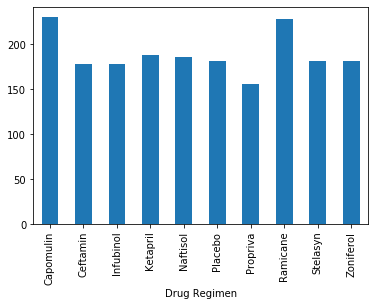

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment
#throughout the course of the study using pyplot.
mousetime = clean_mice.groupby(['Drug Regimen'])['Mouse ID'].count()

mousetime.plot.bar()

## Pie Plots

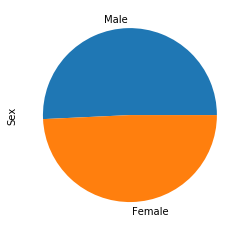

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

micesex = clean_mice['Sex'].value_counts()
micesex.plot.pie()

([<matplotlib.patches.Wedge at 0x294da44c6a0>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

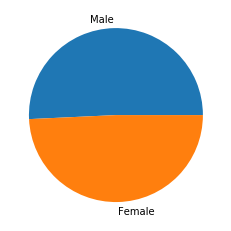

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
micesex = micesex.reset_index()
plt.pie(labels= micesex['index'], x = micesex['Sex'])

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
treatmentsum = clean_mice.loc[clean_mice['Timepoint']==45, ['Drug Regimen', 'Tumor Volume (mm3)']]
treatmentsum['TumorAverage'] = treatmentsum.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].transform('mean')
treatmentsumdropped = treatmentsum.drop_duplicates(subset = 'Drug Regimen')
top4 = treatmentsumdropped.nsmallest(n=4, columns = ['TumorAverage'])['Drug Regimen']
top4sum = treatmentsum.loc[treatmentsum['Drug Regimen'].isin(top4)]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
top4IQR = top4sum.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
top4IQR = round(top4IQR, 2)
top4IQR = top4IQR.drop(columns = ['count', 'mean', 'std', 'min', 'max'])
top4IQR['IQR'] = top4IQR['75%'] - top4IQR['25%']
top4IQR

,25%,50%,75%,IQR
Drug Regimen,,,,
Capomulin,32.38,37.31,40.16,7.78
Ceftamin,61.43,64.30,67.53,6.10
Infubinol,62.75,66.08,67.69,4.94
Ramicane,30.98,34.85,38.51,7.53


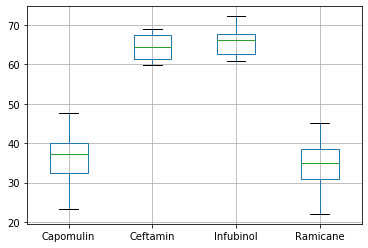

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxdf = top4sum.pivot(columns = 'Drug Regimen', values = 'Tumor Volume (mm3)')
boxdf.boxplot()

## Line and Scatter Plots

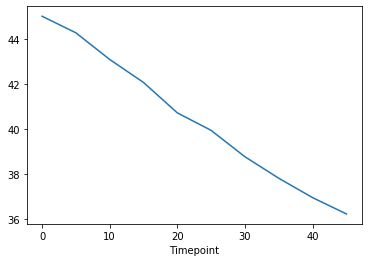

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = clean_mice.loc[clean_mice['Drug Regimen']=='Capomulin', ['Weight (g)', 'Timepoint','Tumor Volume (mm3)']]
Capomulinmean = Capomulin.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
Capomulinmean.plot.line()

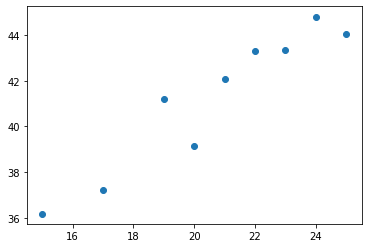

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weightmean = Capomulin.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
weightmean = weightmean.reset_index()
x = weightmean['Weight (g)']
y = weightmean['Tumor Volume (mm3)']
plotted = plt.scatter(x, y)

## Correlation and Regression

Text(15, 43, 'y = 0.89x + 22.76')

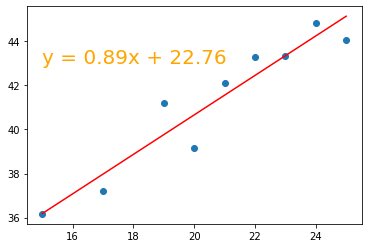

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, r, p, std) = st.linregress(x, y)
regression = x * slope + intercept
line_equation = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
plt.scatter(x,y)
plt.plot(x, regression, "r-")
plt.annotate(line_equation, (15, 43), fontsize=20, color = "orange")